# IMPORT PACKAGES

In [6]:
import glob
import pandas as pd
import math
import glob
import pandas as pd
import numpy as np
from pandas import DataFrame
from numpy import matrix 
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
from yellowbrick.model_selection import LearningCurve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
import joblib
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
import joblib
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,  precision_score, recall_score, classification_report, confusion_matrix
import sklearn.metrics
import multiprocessing
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import warnings

# READ MATRICES

In [2]:
healthy_spearman= [pd.read_csv(n,sep=",", index_col=False,header=None) for n in glob.glob(r'autism-spearman/spearman-healthy/*csv')]
autism_spearman= [pd.read_csv(n,sep=",", index_col=False,header=None) for n in glob.glob(r'autism-spearman/spearman-autism/*csv')]


# FLATTEN 

In [20]:
list_replace_healthy=[]
list_flatten_healthy=[]
def flatten_matrix(x):
    test1 = np.array(x)
    flatten= matrix.flatten(test1)
    return flatten[0:1000]

for i in healthy_spearman:
    list_replace_healthy.append(np.nan_to_num(i))
  
     
for i in list_replace_healthy:
    list_flatten_healthy.append(flatten_matrix(i))

print(len(list_replace_healthy))
print(len(list_flatten_healthy))


list_replace_disease=[]
list_flatten_disease=[]
for i in autism_spearman:
    list_replace_disease.append(np.nan_to_num(i))
     
for i in list_replace_disease:
    list_flatten_disease.append(flatten_matrix(i))
print(len(list_replace_disease))
print(len(list_flatten_disease))

258
258
242
242


# LABELS 

In [21]:
yes_label = [1]*len(list_flatten_disease)
no_label = [0]*len(list_flatten_healthy)

labels = yes_label + no_label
#
print(len(labels))
y=np.nan_to_num(labels)

500


# SPLITING AND  STANDARDIZATION

In [22]:

myScaler = preprocessing.StandardScaler()
X= np.concatenate([list_flatten_disease,list_flatten_healthy],axis=0)
X = myScaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.25, shuffle=True, 
    random_state = 1234)
X_train= np.nan_to_num(X_train)

X_test= np.nan_to_num(X_test)
print(np.shape(X_train))
print(np.shape(X_test))

(375, 1000)
(125, 1000)


# DEFINE MODEL

In [23]:
warnings.filterwarnings("ignore")

def evaluate_model(model, param_grid, X, y):
    skf = StratifiedKFold(n_splits=10)
    recall = []
    precision = []
    f = []
    accuracy = []
    roc = []

    for train_index, test_index in skf.split(X, y):
        xtr, xvl = X.loc[train_index], X.loc[test_index]
        ytr, yvl = y.loc[train_index], y.loc[test_index]

        ytr = ytr.to_numpy().reshape(len(ytr),)
        clf = GridSearchCV(model, param_grid, scoring='roc_auc')
        clf.fit(xtr, ytr)
        clf_best = clf.best_estimator_

        y_pred = clf.best_estimator_.predict(xvl)

        yvl = yvl.to_numpy().reshape(len(yvl),)
        n_classes = len(np.unique(yvl))
        yvl1 = label_binarize(yvl, classes=np.arange(n_classes))
        y_pred1 = label_binarize(y_pred, classes=np.arange(n_classes))

        roc.append(roc_auc_score(yvl,y_pred))
        accuracy.append(accuracy_score(yvl, y_pred))
        recall.append(recall_score(yvl,y_pred))
        precision.append(precision_score(yvl,y_pred,average='weighted'))
      
        f.append(sklearn.metrics.f1_score(yvl,y_pred, average='weighted'))

    return (np.mean(roc), np.std(roc), np.mean(accuracy), np.std(accuracy),
            np.mean(recall), np.std(recall), np.mean(precision), np.std(precision), clf_best)

def parallel_evaluate(model_name, X_train, y_train):
    if model_name == 'RF':
        param_grid = {
            'n_estimators': [1, 2, 3, 5, 10, 30, 50, 100, 200, 300, 500]
        }
        model = RandomForestClassifier(random_state=1234)
    elif model_name == 'SVM':
        param_grid = {'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma': [0.1, 0.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}
        model = SVC(probability=True, random_state=1234)
    elif model_name == 'NB':
        param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
        model = GaussianNB()
    elif model_name == 'MLP':
        param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'learning_rate': ['constant', 'adaptive'],
        }
        model = MLPClassifier(random_state=1234)
    elif model_name == 'KNN':
        param_grid = {
            'n_neighbors': (1, 10, 1),
            'leaf_size': (20, 40, 1),
            'p': (1, 2),
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski', 'chebyshev')
        }
        model = KNeighborsClassifier(random_state=1234)
    elif model_name == 'LR':
        param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
        model = LogisticRegression(random_state=1234)
    elif model_name == 'XGboost':
        param_grid = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
        }
        model = XGBClassifier(random_state=1234)

    roc_mean, std_roc, accuracy_mean, std_accuracy,  recall_mean, std_recall, precision_mean, std_precision, clf = evaluate_model(model, param_grid, X_train, y_train)

    return {
        'Model': model_name,
        'AUC': roc_mean,
        'AUC std': std_roc,
        'Accuracy': accuracy_mean,
        'Accuracy std': std_accuracy,
        'Recall': recall_mean,
        'Recall std': std_recall,
        'Precision': precision_mean,
        'Precision std': std_precision,
        'clf_best': clf
    }



# CALLING THE MODEL

In [24]:
if __name__ == '__main__':
    X_train = pd.DataFrame(X_train)
    y_train = pd.DataFrame(y_train)
    models = ['LR']
    pool = multiprocessing.Pool(processes=len(models))
    results = pool.starmap(parallel_evaluate, [(model, X_train, y_train) for model in models])
    pool.close()
    pool.join()

    # Create a DataFrame to store the results
    df_results = pd.DataFrame(results)

    # Print the results
    print('Train set performance')
    print(df_results)
    
    # Test set performance for the best model
    for model,best_model in zip(df_results['Model'],df_results['clf_best']):
   # best_model = df_results.loc[df_results['AUC'].idxmax()]['clf_best']
       # y_test1 = y_test.to_numpy()
      #  y_test1 = y_test1.reshape(len(y_test1),)
        n_classes = len(np.unique(y_test))
        y_test1= label_binarize(y_test, classes=np.arange(n_classes))
       
        print(model)
        y_pred_test = best_model.predict(X_test)
        y_pred1 = label_binarize(y_pred_test, classes=np.arange(n_classes))
        print('Test set performance')
        print('AUC test:',   roc_auc_score(y_test,y_pred_test))
        print('Accuracy test:', accuracy_score(y_test,y_pred_test))
        print('F1 score test:', f1_score(y_test,y_pred_test, average="macro", pos_label=0))
        print('Recall test:', recall_score(y_test,y_pred_test,average="macro", pos_label=0))
        print('Precision test:', precision_score(y_test,y_pred_test,average="macro", pos_label=0))

        print(classification_report(y_test, y_pred_test))


Train set performance
  Model  AUC  AUC std  Accuracy  Accuracy std  Recall  Recall std  Precision  \
0    LR  1.0      0.0       1.0           0.0     1.0         0.0        1.0   

   Precision std                                        clf_best  
0            0.0  LogisticRegression(C=0.001, random_state=1234)  
LR
Test set performance
AUC test: 0.9921875
Accuracy test: 0.992
F1 score test: 0.9919979514755777
Recall test: 0.9921875
Precision test: 0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.98      1.00      0.99        61

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



# CONFUSION MATRIX

Confusion matrix


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

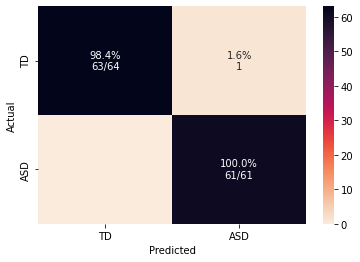

In [25]:
print('Confusion matrix')
list_names=['TD','ASD']
cm = confusion_matrix(y_test, y_pred_test)
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(cm)
   # print(cm)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
#fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(cm, annot=annot, fmt='',cmap='rocket_r',xticklabels=list_names, yticklabels=list_names)
#plt.savefig("CM/confusion-matrix-mlp.pdf",dpi=300, bbox_inches = "tight")

# ROC CURVE

Roc curve


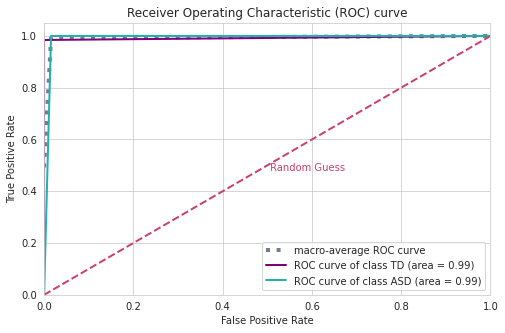

In [39]:

print('Roc curve')
n_classes =2

t1=sum(x==0 for x in y_pred_test-y_test)/len(y_test)

    ### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred_test))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve'
               ''.format(roc_auc["macro"]),
         color='slategray', linestyle=':', linewidth=4)

colors = cycle(['purple', 'lightseagreen'])
for i, color, name in zip(range(n_classes), colors,list_names):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class "+ name + " (area = {1:0.2f})".format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], "k--",color='#cb416b', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate(' Random Guess',(.5,.48),color='#cb416b')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend()


# LEARNING CURVE

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

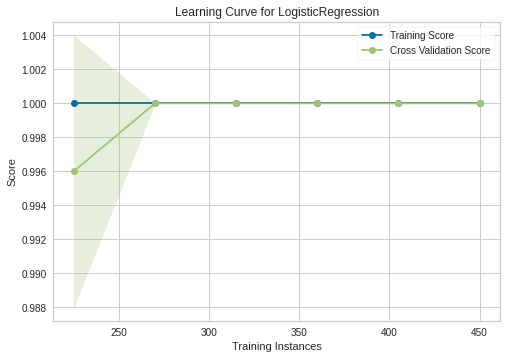

In [41]:

sizes = np.linspace(0.1, 1, 10)
visualizer = LearningCurve(
    best_model, cv=10, scoring='accuracy', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)
# Fit the data to the visualizer
visualizer.show(outpath="Learning-curve-SVM-multiclas")